<a href="https://colab.research.google.com/github/muskan9887/Asteroid_hazardous_or_not/blob/main/random_forest_for_hazardous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

nasa_data=pd.read_csv("C:/Users/chand/Desktop/nasa.csv")

features_to_drop = ['Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
                    'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)',
                    'Est Dia in Feet(max)', 'Relative Velocity km per hr', 'Miles per hour',
                    'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)',
                    'Mean Motion', 'Perihelion Time', 'Orbital Period', 'Aphelion Dist',
                    'Semi Major Axis', 'Neo Reference ID', 'Name', 'Close Approach Date',
                    'Epoch Date Close Approach', 'Orbit ID', 'Orbit Determination Date',
                    'Orbiting Body', 'Equinox', 'Est Dia in KM(min)',
                    'Relative Velocity km per sec', 'Epoch Osculation', 'Inclination']


nasa_data_cleaned = nasa_data.drop(features_to_drop, axis=1)
nasa_data_cleaned['Hazardous'] = OrdinalEncoder(dtype = np.int64).fit_transform(nasa_data_cleaned[['Hazardous']])
nasa_data_cleaned.Hazardous.head(5)

X = nasa_data_cleaned.drop("Hazardous", axis=1)
y = nasa_data_cleaned["Hazardous"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


acc_scores = []


for i in range(1, 51, 2):

    model = RandomForestClassifier(n_estimators=i, criterion='gini', random_state=1)


    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    acc_score = accuracy_score(y_test, y_pred)
    acc_scores.append((i, acc_score))


best_n_estimators = max(acc_scores, key=lambda x: x[1])[0]

print("Best n_estimators:", best_n_estimators)


scaler = RobustScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


final_model = RandomForestClassifier(n_estimators=best_n_estimators, criterion='gini', random_state=1)
final_model.fit(X_train_scaled, y_train)


Best n_estimators: 3


RandomForestClassifier(n_estimators=3, random_state=1)

In [ ]:
nasa_data_cleaned.columns

Index(['Absolute Magnitude', 'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Eccentricity', 'Asc Node Longitude', 'Perihelion Distance',
       'Perihelion Arg', 'Mean Anomaly', 'Hazardous'],
      dtype='object')

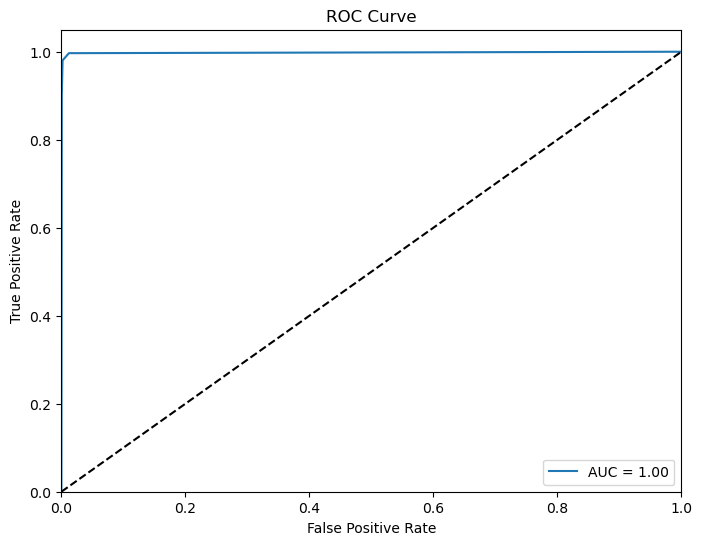

Cross-Validation Metrics:
Mean Accuracy: 0.9951992879394748
Mean Precision: 0.9902019295290829
Mean Recall: 0.9802601273540171
Mean F1-score: 0.9851427744440109

Test Set Metrics:
Precision: 1.0
Recall: 0.9795918367346939
F1-score: 0.9896907216494846

Confusion Matrix:
[[791   0]
 [  3 144]]


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf_model = RandomForestClassifier(n_estimators=best_n_estimators, criterion='gini', random_state=1)


cv_accuracy = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_precision = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='precision')
cv_recall = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv, scoring='f1')


rf_model.fit(X_train_scaled, y_train)

t
y_pred = rf_model.predict(X_test_scaled)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)


y_scores = cross_val_predict(rf_model, X_train_scaled, y_train, cv=cv, method="predict_proba")
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


print("Cross-Validation Metrics:")
print("Mean Accuracy:", cv_accuracy.mean())
print("Mean Precision:", cv_precision.mean())
print("Mean Recall:", cv_recall.mean())
print("Mean F1-score:", cv_f1.mean())
print("\nTest Set Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)
